### Importing the Required Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("survey_results_public.csv")

### Displaying the Top 5 Rows of the Dataset

In [3]:
data.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


### Retaining Only Necessary Columns

In [4]:
data.columns


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
data=data[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]

In [6]:
data.columns


Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp'], dtype='object')

### Keeping the Data of Only Full Time Employee

In [7]:
data=data[data["Employment"]=="Employed full-time"]

In [8]:
data=data.drop(columns=["Employment"],axis=1)

In [9]:
data.head()

,Country,EdLevel,YearsCodePro,ConvertedComp
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,NaN
5,Germany,"Secondary school (e.g. American high school, G...",4,NaN
6,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0


In [10]:
data=data.rename({"YearsCodePro":"Experience(Years)","ConvertedComp":"Salary"},axis=1)

In [11]:
data.head()

,Country,EdLevel,Experience(Years),Salary
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,NaN
5,Germany,"Secondary school (e.g. American high school, G...",4,NaN
6,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0


In [12]:
### Dropping the Missing Values

In [13]:
data=data[data["Salary"].notnull()]

In [14]:
data.head()

,Country,EdLevel,Experience(Years),Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


### Data Cleaning[Country]

In [15]:
data["Country"].value_counts()

Country
United States     7628
India             2514
United Kingdom    2317
Germany           1994
Canada            1225
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [16]:
def clean_country(country_value_counts, cutoff):
    categorical_map = {}
    for i in range(len(country_value_counts)):
        if country_value_counts.values[i] >= cutoff:
            categorical_map[country_value_counts.index[i]] = country_value_counts.index[i]
        else:
            categorical_map[country_value_counts.index[i]] = "Other"
    return categorical_map

# Call the value_counts method and pass its result to the function
country_map = clean_country(data['Country'].value_counts(), 400)
data['Country'] = data['Country'].map(country_map)

In [17]:
data["Country"].value_counts()

Country
Other                 8717
United States         7628
India                 2514
United Kingdom        2317
Germany               1994
Canada                1225
Brazil                1005
France                 991
Spain                  685
Australia              676
Netherlands            663
Poland                 571
Italy                  562
Russian Federation     538
Sweden                 522
Name: count, dtype: int64

### Data Cleaning[EdLevel]

In [18]:
data["EdLevel"].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          15229
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        7655
Some college/university study without earning a degree                                 3364
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1160
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1032
Associate degree (A.A., A.S., etc.)                                                    1025
Professional degree (JD, MD, etc.)                                                      423
I never completed any formal education                                                  121
Primary/elementary school                                                               118
Name: count, dtype: int64

In [19]:
data.dtypes

Country               object
EdLevel               object
Experience(Years)     object
Salary               float64
dtype: object

In [20]:
def clean_education(x):
    if pd.isnull(x):
        return "Less than a Bachelor's Degree"  # Or any other appropriate value for NaN
    elif "Bachelor’s degree" in x:
        return "Bachelors Degree"
    elif "Master’s degree" in  x: 
        return "Master's Degree"
    elif "doctoral degree" in x:
        return "Post Graduate"
    elif "Associate degree" in x:
        return "Post Graduate"
    elif "Professional degree" in x:
        return "Post Graduate"
    else:
        return "Less than a Bachelor's Degree"

data["EdLevel"] = data["EdLevel"].apply(clean_education)
print(data["EdLevel"].value_counts())

EdLevel
Bachelors Degree                 15229
Master's Degree                   7655
Less than a Bachelor's Degree     5244
Post Graduate                     2480
Name: count, dtype: int64


### Data Cleaning[Experience(Years)]

In [21]:
data["Experience(Years)"].value_counts()

Experience(Years)
3                     3263
2                     3163
5                     2720
4                     2507
6                     1987
10                    1802
1                     1735
7                     1587
8                     1554
Less than 1 year      1237
12                     972
15                     961
9                      864
20                     862
11                     683
13                     629
14                     496
16                     408
25                     331
18                     322
17                     295
22                     276
19                     245
21                     239
23                     208
30                     183
24                     148
26                     108
27                      93
35                      85
28                      77
32                      56
33                      50
31                      48
29                      45
34                      44
38        

In [22]:
data["Experience(Years)"]=data["Experience(Years)"].replace({"Less than 1 year":"1","More than 50 years":"50"})

In [23]:
data["Experience(Years)"].value_counts()

Experience(Years)
3     3263
2     3163
1     2972
5     2720
4     2507
6     1987
10    1802
7     1587
8     1554
12     972
15     961
9      864
20     862
11     683
13     629
14     496
16     408
25     331
18     322
17     295
22     276
19     245
21     239
23     208
30     183
24     148
26     108
27      93
35      85
28      77
32      56
33      50
31      48
29      45
34      44
38      41
40      39
36      27
37      25
39      24
50      14
42      12
41      10
45       6
43       4
44       3
47       2
49       1
46       1
Name: count, dtype: int64

In [24]:
data["Experience(Years)"]=data["Experience(Years)"].astype(float)

In [25]:
data.dtypes

Country               object
EdLevel               object
Experience(Years)    float64
Salary               float64
dtype: object

### Data Cleaning[Salary]

<Axes: xlabel='Salary', ylabel='Country'>

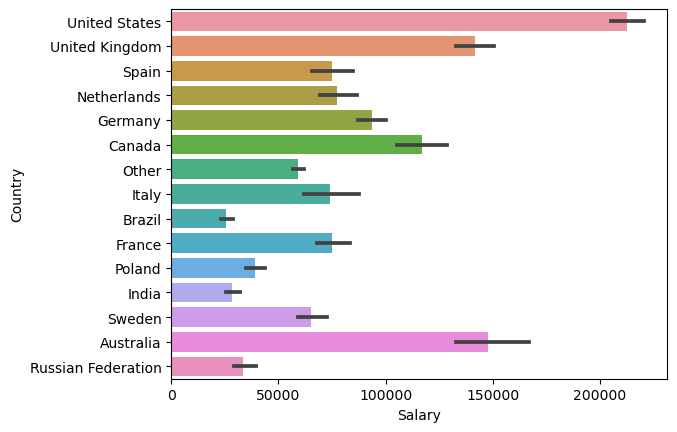

In [29]:
sns.barplot(x="Salary",y="Country",data=data)

In [30]:
data=data[data["Salary"]>=10000]
data=data[data["Salary"]<=250000]

In [31]:
data=data[data["Country"]!="Other"]

In [35]:
data2=data.to_csv("survey_results_public(Filtered).csv",index=None)